In [33]:
import pandas as pd
import pickle as pkl
import time
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
phrases=pd.read_pickle('../Compounding/datasets/phrases.pkl')

In [3]:
def year_binner(year,val=10):
    return year - year%val

In [4]:
context_df=phrases[['context','year','count']].copy()
context_df[['word','pos']]=context_df.context.str.split('_',expand=True,n=1)
context_df=context_df.loc[context_df.pos.isin(['NOUN','ADJ','VERB','ADV','PROPN'])]
context_df['context']=context_df.word+"_"+context_df.pos
context_df

,context,year,count,word,pos
1,run_VERB,2006,1,run,VERB
4,e_NOUN,2006,3,e,NOUN
7,run_VERB,2006,2,run,VERB
8,-_ADJ,1930,1,-,ADJ
11,child_NOUN,1930,1,child,NOUN
...,...,...,...,...,...
76534505,y_NOUN,1944,2,y,NOUN
76534507,clear_ADJ,1935,1,clear,ADJ
76534508,still_ADV,1935,2,still,ADV
76534510,ug_ADV,1935,3,ug,ADV


In [5]:
context_df['decade']=year_binner(context_df['year'].values,10)

In [6]:
decade_df=context_df.groupby(['decade'])['count'].sum().to_frame().reset_index()

In [7]:
decade_df['count_per']=decade_df['count']/decade_df['count'].sum()*100
decade_df

,decade,count,count_per
0,1810,126294,0.200093
1,1820,395116,0.625999
2,1830,1040770,1.648936
3,1840,1206895,1.912134
4,1850,1240338,1.965120
5,1860,1621445,2.568923
6,1870,1885283,2.986933
7,1880,2174010,3.444375
8,1890,2220338,3.517775
9,1900,2589544,4.102723


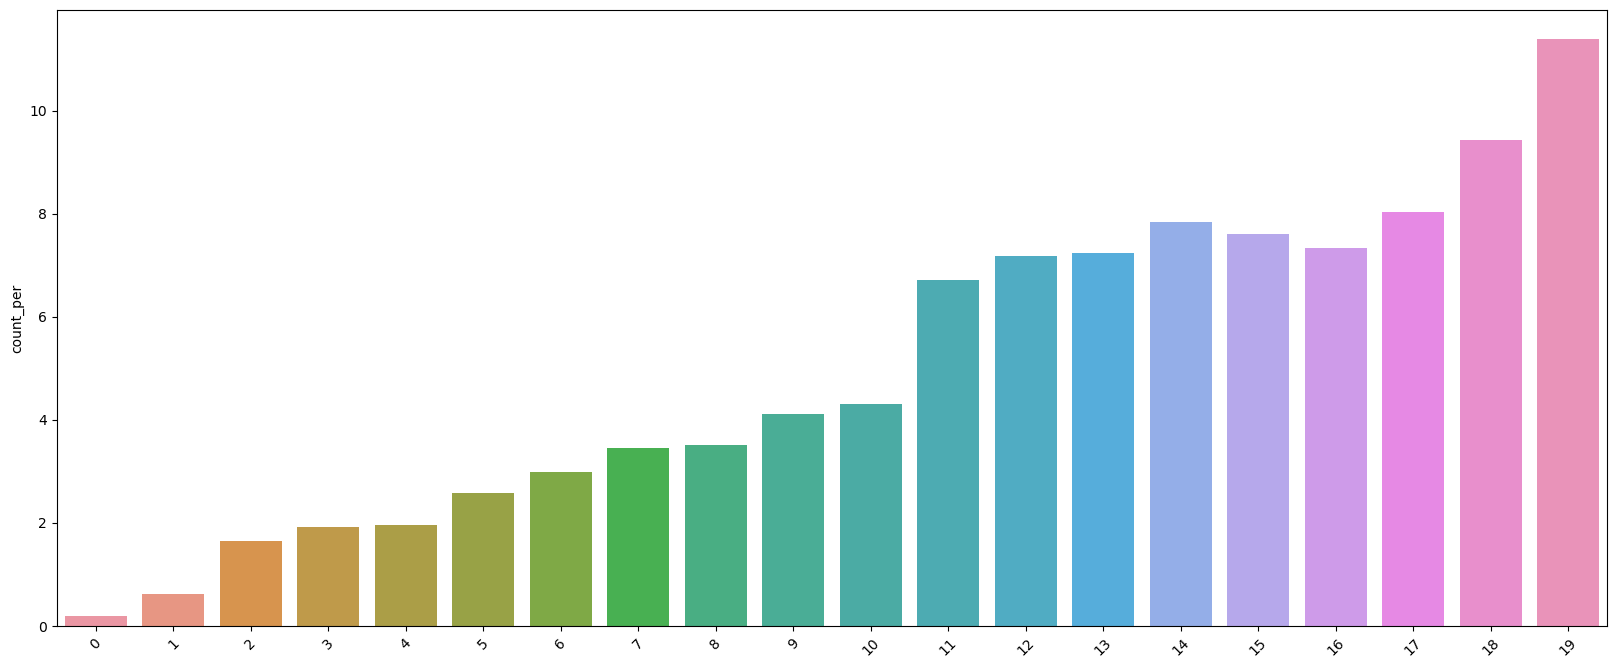

In [8]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x=decade_df.index, y="count_per", data=decade_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

In [9]:
year_counts_df=context_df.groupby(['year'])['count'].sum().to_frame().reset_index()
year_counts_df['count_per']=year_counts_df['count']/year_counts_df['count'].sum()*100
year_counts_df

,year,count,count_per
0,1810,3511,0.005563
1,1811,11070,0.017539
2,1812,10976,0.017390
3,1813,1121,0.001776
4,1814,3387,0.005366
...,...,...,...
195,2005,1137328,1.801916
196,2006,900597,1.426854
197,2007,701260,1.111036
198,2008,128998,0.204377


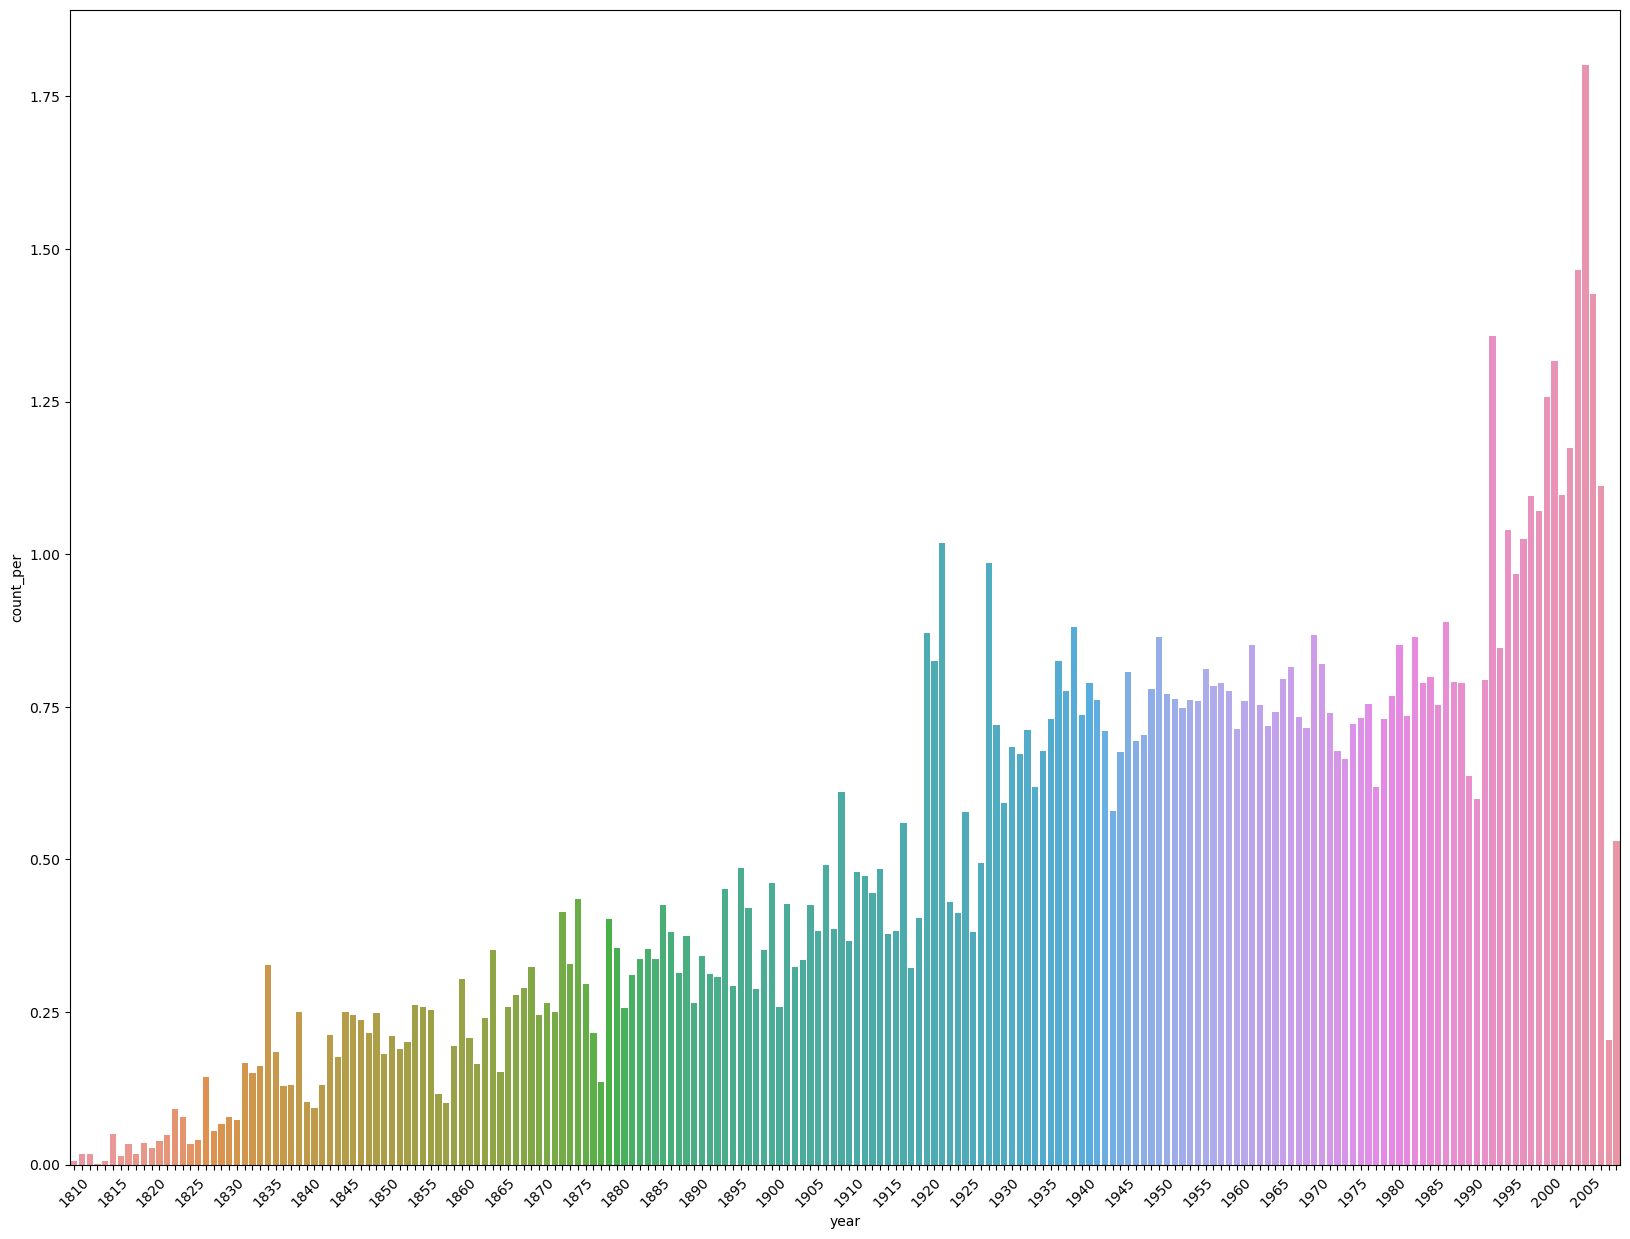

In [10]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x='year', y="count_per", data=year_counts_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [11]:
presence_df=context_df.groupby(['context','decade']).size().to_frame().reset_index().context.value_counts().to_frame()
total_list=presence_df.loc[presence_df.context==20].index.to_list()
len(total_list)

5625

In [28]:
def topk_decade(df,k=10_000):
    
    df=df.groupby(['context'])['count'].sum().to_frame().reset_index()
    return df.sort_values(by='count',ascending=False).head(k)['context'].to_list()

In [12]:
content_words_df=context_df.groupby(['context'])['count'].sum().to_frame().reset_index()
content_words_df

,context,count
0,!_ADJ,1
1,!_NOUN,3
2,!_PROPN,63
3,"""_ADJ",4
4,"""_NOUN",1432
...,...,...
503137,zzz_NOUN,2
503138,zzzeus_NOUN,3
503139,zzzzsock_NOUN,1
503140,zzzzzzz_ADJ,1


In [37]:
topk_lists=context_df.groupby(['decade']).apply(topk_decade)
topk_lists=list((set(itertools.chain.from_iterable(topk_lists))))
len(topk_lists)

33977

In [42]:
context_top_50k=content_words_df.sort_values(by='count',ascending=False).head(50_000)['context'].to_list()
len(context_top_50k)

50000

In [43]:
to_save_context=list(set(context_top_50k).union(topk_lists))
len(to_save_context)

55123

In [44]:
plot_df=context_df.loc[context_df.context.isin(to_save_context)].groupby(['year'])['count'].sum().to_frame().reset_index()
plot_df=plot_df.set_index('year')/year_counts_df.set_index('year')*100
plot_df

,count,count_per
year,,
1810,100.000000,NaN
1811,100.000000,NaN
1812,100.000000,NaN
1813,100.000000,NaN
1814,100.000000,NaN
...,...,...
2005,95.940485,NaN
2006,94.044284,NaN
2007,94.107749,NaN


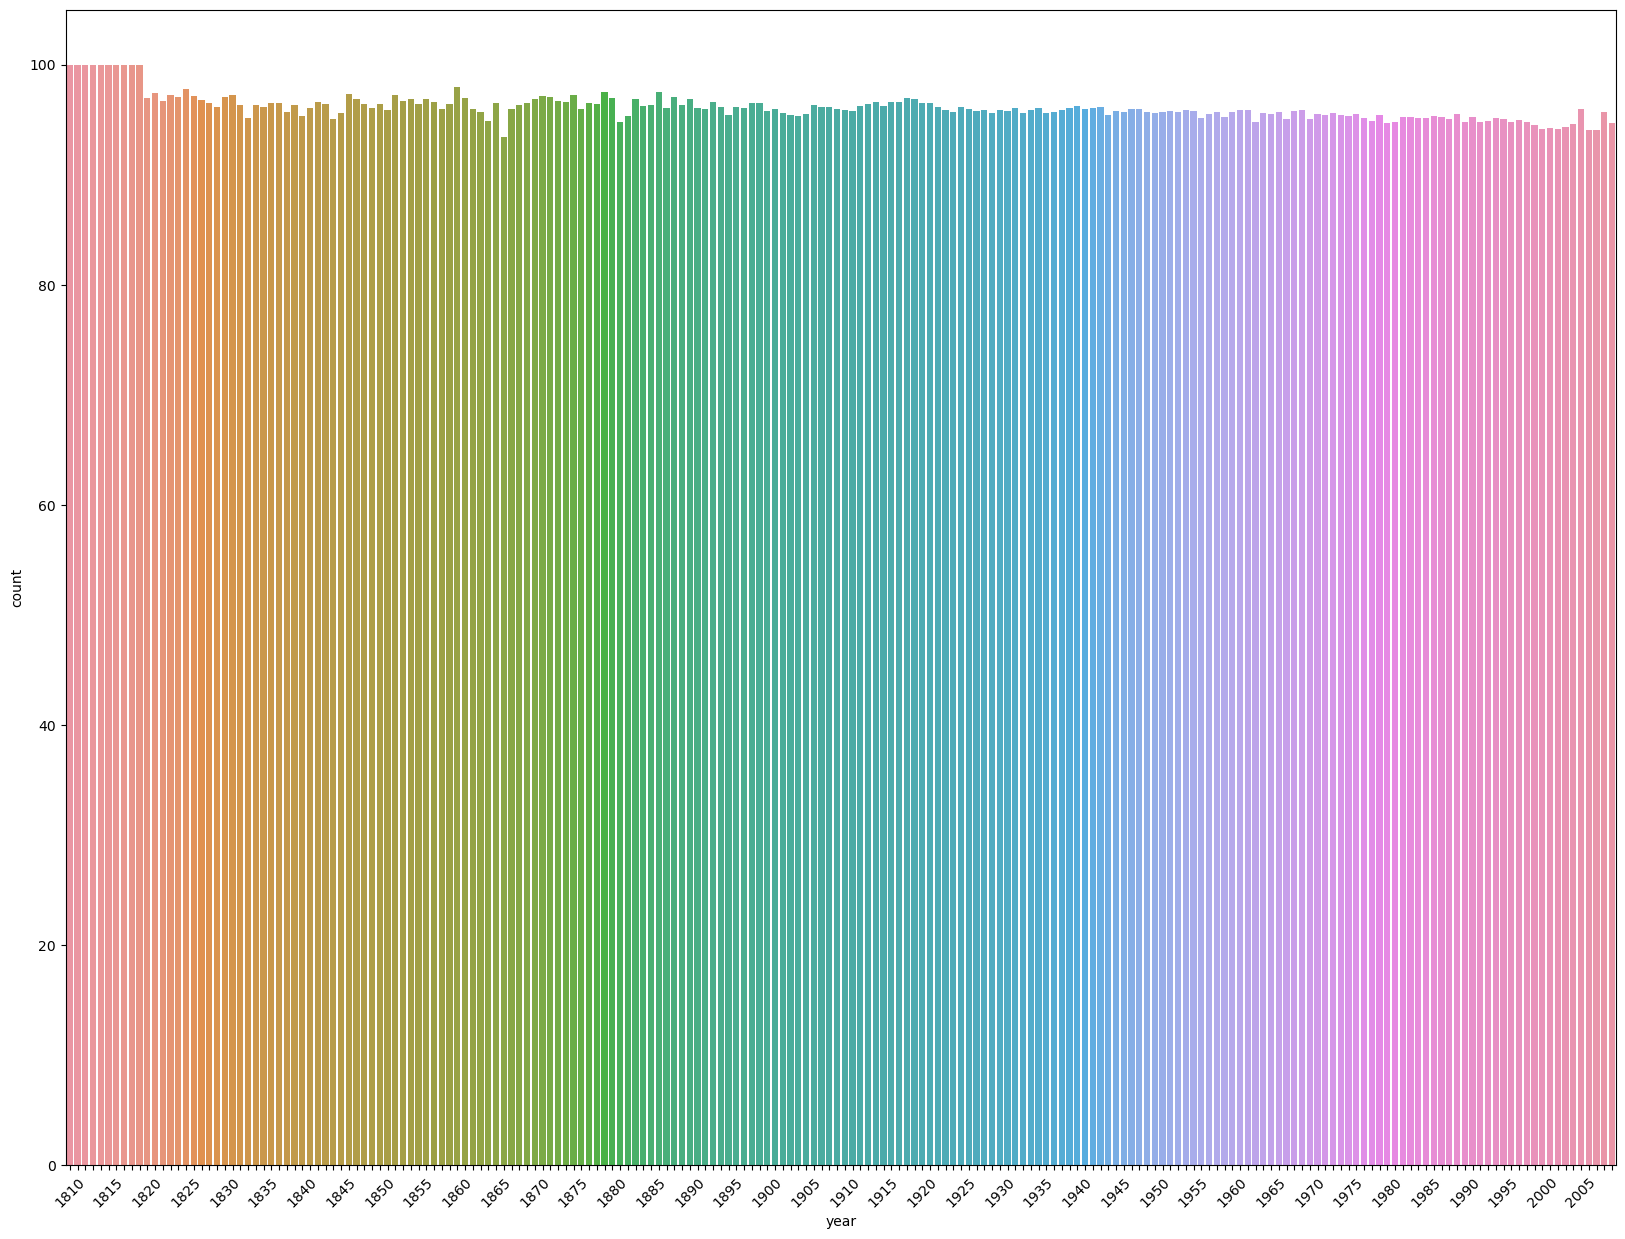

In [45]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="count", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5  # Keeps every 7th label
_=[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [46]:
plot_df=context_df.loc[context_df.context.isin(to_save_context)]['year'].value_counts().to_frame()
plot_df=plot_df/context_df['year'].value_counts().to_frame()*100
plot_df.columns=['types_per']
plot_df

,types_per
1810,100.000000
1811,100.000000
1812,100.000000
1813,100.000000
1814,100.000000
...,...
2005,93.945523
2006,93.451230
2007,93.638353
2008,95.422269


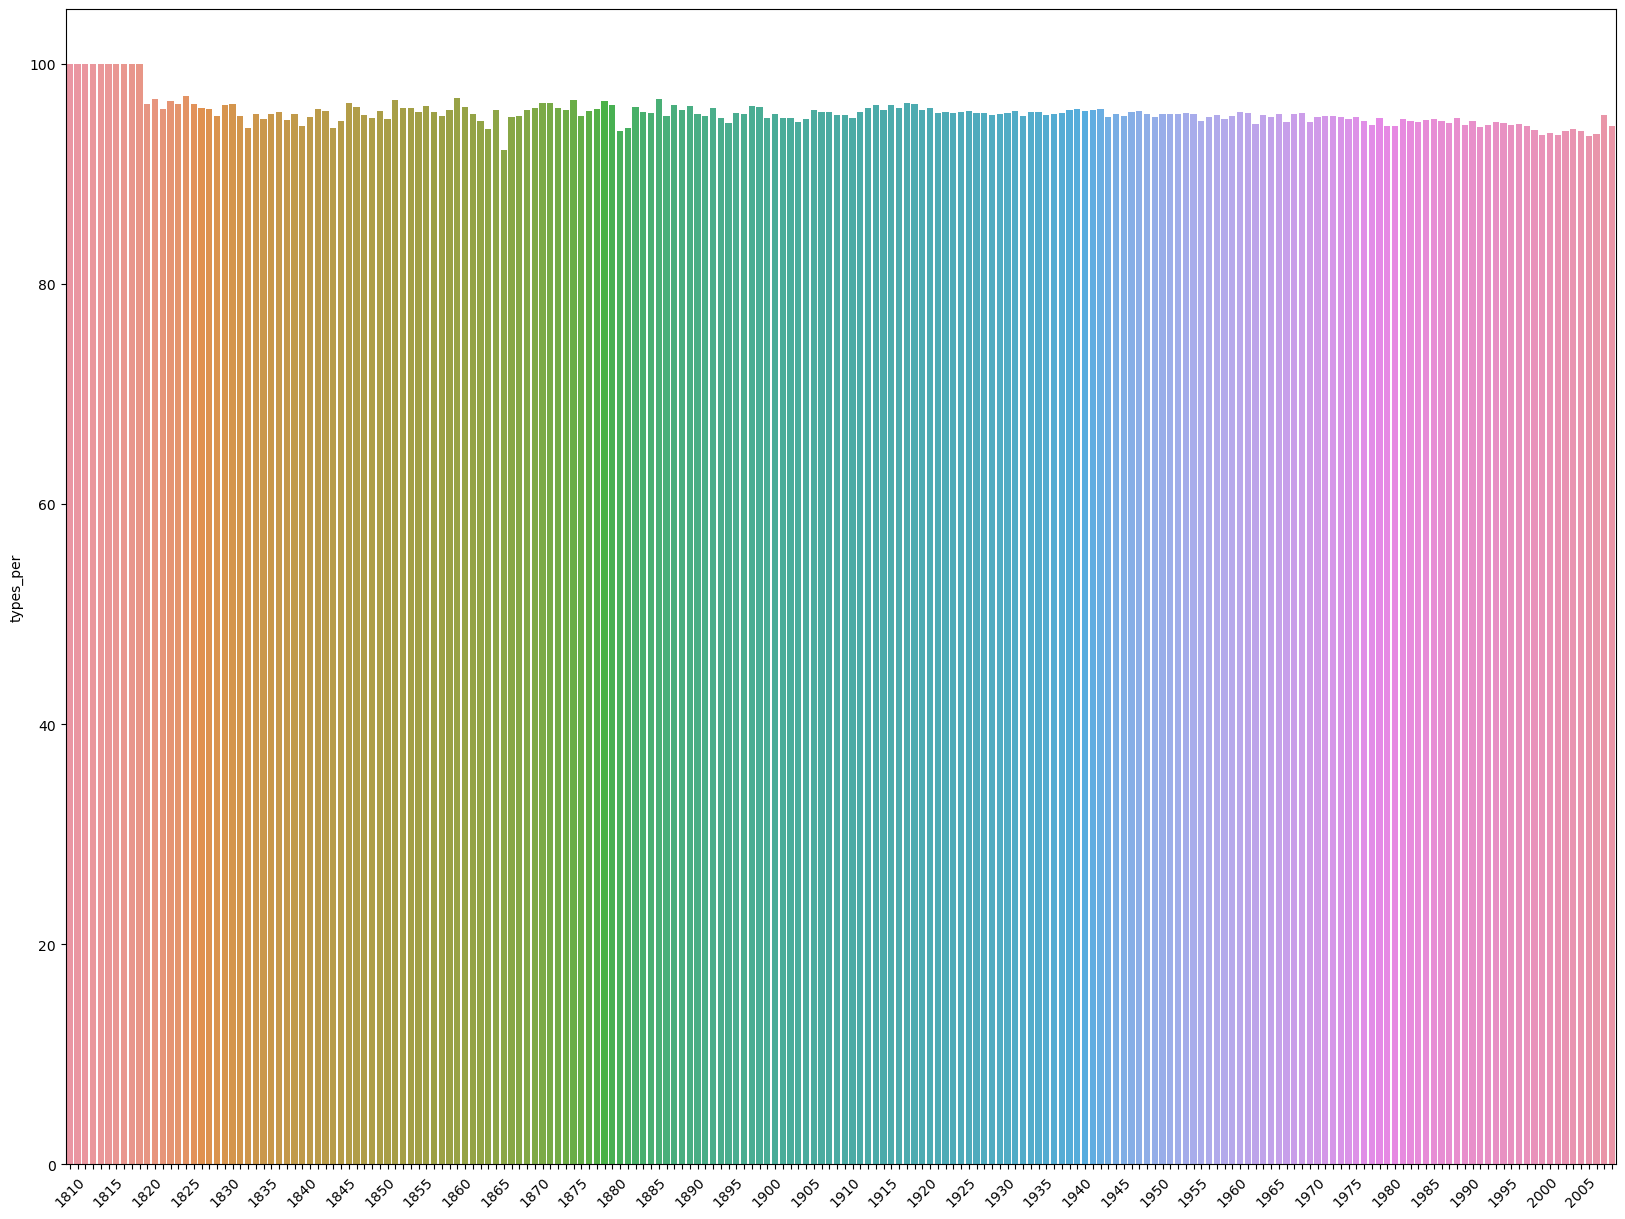

In [47]:
plt.figure(figsize = (20,15))
ax = sns.barplot(x=plot_df.index, y="types_per", data=plot_df)
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
n = 5 
_=[lab.set_visible(False) for (i,lab) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [48]:
context_df.loc[context_df.context.isin(to_save_context)]['year'].value_counts().to_frame()

,year
2006,484839
2004,484167
1993,443423
2001,439796
2005,437090
...,...
1816,4305
1811,4105
1810,1907
1814,1438


In [49]:
context_df.loc[context_df.context.isin(to_save_context)]['decade'].value_counts().to_frame()

,decade
2000,3658372
1990,3165070
1980,2726065
1950,2655138
1960,2591404
1970,2511005
1940,2462049
1930,2403014
1920,2198464
1910,1342293


In [50]:
with open('../Compounding/datasets/contexts_top50k.pkl', 'wb') as f:
    pkl.dump(to_save_context, f)